## 1. Install and Import Dependencies


In [1]:
!pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 46.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.wh

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
import pickle

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


## 2. Read in Data and Process Dates

In [3]:
df = pd.read_csv(r'/content/weatherData.csv')
df

,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),sunrise,sunset
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,0.0,0.0,0,12.2,27.4,19,20.92,4.61,06:22,18:05
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,0.1,0.1,1,13.0,27.0,24,17.71,3.91,06:22,18:06
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,0.6,0.6,3,12.3,27.4,17,17.76,3.66,06:22,18:06
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,0.0,0.0,0,17.0,34.6,357,16.50,3.75,06:23,18:07
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,0.0,0.0,0,18.7,37.1,353,23.61,5.00,06:23,18:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142366,26,6/4/2024,53,24.4,18.2,21.2,28.6,19.8,23.9,45005.79,...,1.7,1.7,8,11.3,27.4,210,21.33,3.83,05:49,18:19
142367,26,6/5/2024,51,24.9,18.9,21.1,29.1,20.5,23.5,45013.46,...,1.4,1.4,8,13.1,30.6,209,20.28,3.62,05:49,18:19
142368,26,6/6/2024,53,24.3,16.9,20.4,28.1,17.6,22.6,45020.70,...,1.8,1.8,10,10.9,27.7,203,20.02,3.61,05:49,18:19
142369,26,6/7/2024,53,23.9,18.9,20.9,27.5,20.7,23.5,45027.51,...,4.3,4.3,14,11.9,29.2,200,18.74,3.33,05:49,18:20


In [4]:
df.location_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

Location_id[0] indicates Colombo City

In [5]:
df.columns

Index(['location_id', 'date', 'weather_code (wmo code)',
       'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
       'daylight_duration (s)', 'sunshine_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'precipitation_hours (h)',
       'wind_speed_10m_max (km/h)', 'wind_gusts_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)',
       'et0_fao_evapotranspiration (mm)', 'sunrise', 'sunset'],
      dtype='object')

In [6]:
df.dtypes

location_id                          int64
date                                object
weather_code (wmo code)              int64
temperature_2m_max (°C)            float64
temperature_2m_min (°C)            float64
temperature_2m_mean (°C)           float64
apparent_temperature_max (°C)      float64
apparent_temperature_min (°C)      float64
apparent_temperature_mean (°C)     float64
daylight_duration (s)              float64
sunshine_duration (s)              float64
precipitation_sum (mm)             float64
rain_sum (mm)                      float64
precipitation_hours (h)              int64
wind_speed_10m_max (km/h)          float64
wind_gusts_10m_max (km/h)          float64
wind_direction_10m_dominant (°)      int64
shortwave_radiation_sum (MJ/m²)    float64
et0_fao_evapotranspiration (mm)    float64
sunrise                             object
sunset                              object
dtype: object

In [7]:
cmb = df[df['location_id']==0]
cmb['Date'] = pd.to_datetime(cmb['date'])
cmb.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-7-67774e7a3d7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmb['Date'] = pd.to_datetime(cmb['date'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmb['Date'] = pd.to_datetime(cmb['date'])



,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),sunrise,sunset,Date
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,0.0,0,12.2,27.4,19,20.92,4.61,06:22,18:05,2010-01-01
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,0.1,1,13.0,27.0,24,17.71,3.91,06:22,18:06,2010-01-02
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,0.6,3,12.3,27.4,17,17.76,3.66,06:22,18:06,2010-01-03
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,0.0,0,17.0,34.6,357,16.50,3.75,06:23,18:07,2010-01-04
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,0.0,0,18.7,37.1,353,23.61,5.00,06:23,18:07,2010-01-05


In [8]:
cmb.dtypes

location_id                                 int64
date                                       object
weather_code (wmo code)                     int64
temperature_2m_max (°C)                   float64
temperature_2m_min (°C)                   float64
temperature_2m_mean (°C)                  float64
apparent_temperature_max (°C)             float64
apparent_temperature_min (°C)             float64
apparent_temperature_mean (°C)            float64
daylight_duration (s)                     float64
sunshine_duration (s)                     float64
precipitation_sum (mm)                    float64
rain_sum (mm)                             float64
precipitation_hours (h)                     int64
wind_speed_10m_max (km/h)                 float64
wind_gusts_10m_max (km/h)                 float64
wind_direction_10m_dominant (°)             int64
shortwave_radiation_sum (MJ/m²)           float64
et0_fao_evapotranspiration (mm)           float64
sunrise                                    object


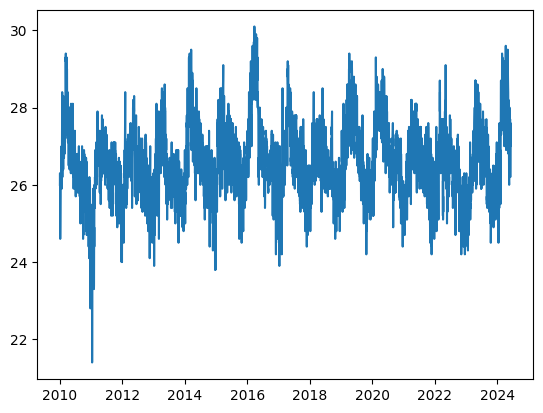

In [9]:
import matplotlib.pyplot as plt

plt.plot(cmb['Date'], cmb['temperature_2m_mean (°C)'])
plt.show()

In [10]:
cmb.tail()

,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),sunrise,sunset,Date
5268,0,6/4/2024,51,29.6,25.9,27.4,35.5,30.4,31.9,45020.06,...,3.0,18,20.3,39.6,196,19.14,3.82,05:53,18:23,2024-06-04
5269,0,6/5/2024,51,29.8,25.4,27.6,34.8,29.9,32.0,45027.80,...,2.0,12,20.6,39.6,194,20.73,4.24,05:53,18:24,2024-06-05
5270,0,6/6/2024,53,29.4,25.6,27.3,34.8,29.8,31.6,45035.12,...,2.1,11,20.6,39.6,185,19.13,3.91,05:53,18:24,2024-06-06
5271,0,6/7/2024,61,29.3,24.9,27.0,34.3,29.3,31.1,45041.99,...,6.8,20,23.9,46.1,191,19.66,3.93,05:53,18:24,2024-06-07
5272,0,6/8/2024,53,29.4,25.1,27.1,34.6,29.1,31.0,45048.43,...,3.8,15,23.5,45.7,196,19.74,4.04,05:54,18:24,2024-06-08


In [11]:
data = cmb[(cmb['location_id']==0)]
data.dropna(inplace=True)
data = cmb[['Date', 'temperature_2m_mean (°C)']]
data.columns = ['ds', 'y']
data.head()

,ds,y
0,2010-01-01,26.0
1,2010-01-02,26.3
2,2010-01-03,26.0
3,2010-01-04,25.7
4,2010-01-05,24.6


## 3. Train Model

In [12]:
m = NeuralProphet()
m.fit(data, freq = 'D', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.981% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.981% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (83) is too small than the required number                     for the learning rate finder (243). The results might not be optimal.


Finding best initial lr:   0%|          | 0/243 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 25. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.835312,0.0,8.213651,9.699705,0.831618,0.0,0
1,0.314292,0.0,3.687175,4.572635,0.313748,0.0,1
2,0.083707,0.0,1.579781,1.953786,0.083374,0.0,2
3,0.026903,0.0,0.865824,1.091008,0.026922,0.0,3
4,0.017894,0.0,0.681700,0.859893,0.017874,0.0,4
...,...,...,...,...,...,...,...
95,0.012564,0.0,0.543833,0.683554,0.012549,0.0,95
96,0.012574,0.0,0.544289,0.683882,0.012562,0.0,96
97,0.012552,0.0,0.544771,0.685627,0.012603,0.0,97
98,0.012546,0.0,0.543270,0.683998,0.012535,0.0,98


## 4. Forecast Away

In [13]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.981% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.981% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2024-06-09,None,26.901543,26.470415,0.412956,0.018171
1,2024-06-10,None,26.857811,26.470364,0.403265,-0.015817
2,2024-06-11,None,26.856638,26.470310,0.393834,-0.007507
3,2024-06-12,None,26.850208,26.470259,0.384607,-0.004659
4,2024-06-13,None,26.836391,26.470207,0.375676,-0.009491


In [14]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
895,2026-11-21,None,25.601635,26.424274,-0.848944,0.026304
896,2026-11-22,None,25.596025,26.424223,-0.846346,0.018148
897,2026-11-23,None,25.564764,26.424171,-0.843633,-0.015776
898,2026-11-24,None,25.575714,26.424120,-0.840901,-0.007506
899,2026-11-25,None,25.581192,26.424068,-0.838216,-0.004661


In [15]:
m.set_plotting_backend("plotly-static")

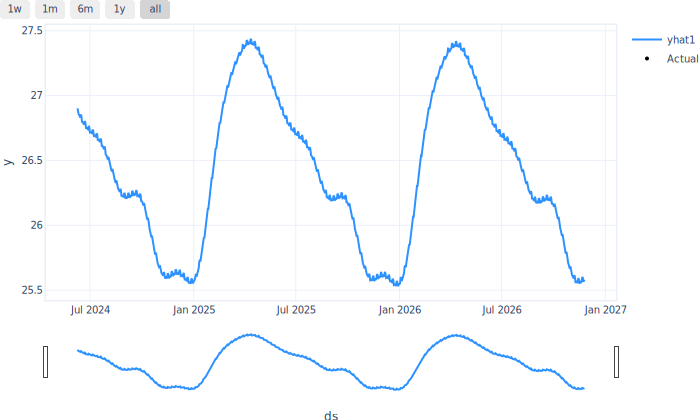

In [16]:
plot1 = m.plot(forecast)

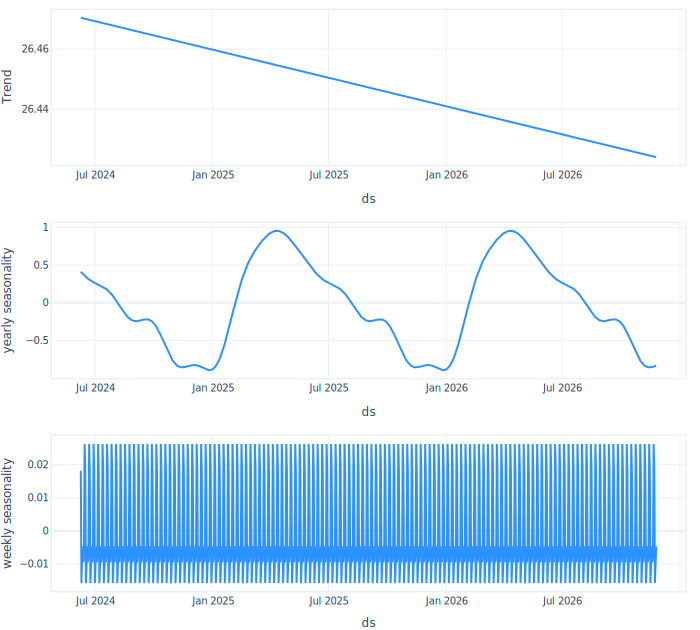

In [17]:
plot2 = m.plot_components(forecast)

## 5. Save Model

In [18]:
with open('cmb_forecast_model.pkl', "wb") as f:
  pickle.dump(m, f)

In [19]:
del m

In [20]:
with open('cmb_forecast_model.pkl', "rb") as f:
  m = pickle.load(f)

In [21]:
m

In [22]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.981% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.981% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2024-06-09,None,26.901543,26.470415,0.412956,0.018171
1,2024-06-10,None,26.857811,26.470364,0.403265,-0.015817
2,2024-06-11,None,26.856638,26.470310,0.393834,-0.007507
3,2024-06-12,None,26.850208,26.470259,0.384607,-0.004659
4,2024-06-13,None,26.836391,26.470207,0.375676,-0.009491


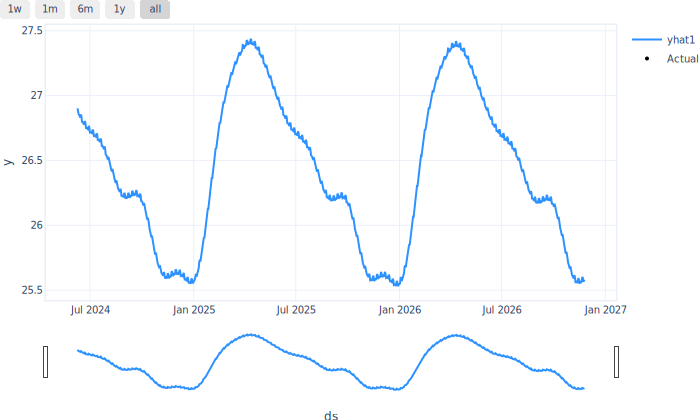

In [23]:
plot = m.plot(forecast)